## Estimate Home Values in Zillow

Faith Kane
10/18/2019

### Goals:

### Import Modules:

In [1]:
import csv
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std
from sklearn.metrics import mean_squared_error,r2_score,explained_variance_score
from math import sqrt
import seaborn as sns
import matplotlib.pyplot as plt


import env
import util
import wrangle_zillow
import split_scale_zillow
import features_zillow
import model_zillow

#### Read In, Clean and Transform the Data Using wrangle_zillow()

In [2]:
df = wrangle_zillow.wrangle_zillow()

#### Summarize the Data Using tell_me_about(df)

In [3]:
util.tell_me_about(df)

DataFrame Shape:

(15956, 7)

Info about:

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15956 entries, 0 to 15955
Data columns (total 7 columns):
bedrooms               15956 non-null float64
bathrooms              15956 non-null float64
square_feet            15956 non-null int64
taxes                  15956 non-null float64
home_value             15956 non-null float64
propertylandusedesc    15956 non-null category
fips_number            15956 non-null int64
dtypes: category(1), float64(4), int64(2)
memory usage: 888.3 KB
None

Describe:

           bedrooms     bathrooms   square_feet          taxes    home_value  \
count  15956.000000  15956.000000  15956.000000   15956.000000  1.595600e+04   
mean       3.253384      2.215844   1837.197794    5681.839846  4.634078e+05   
std        0.949643      1.026662    984.838795    7466.645847  6.434229e+05   
min        1.000000      1.000000    320.000000      49.180000  1.216800e+04   
25%        3.000000      2.000000   1233.000000 

#### Split the Data Using split_my_data(df) and Assign Features (x) and Target (y)

In [4]:
train, test = split_scale_zillow.split_my_data(df)

In [5]:
x_train = train[["bedrooms", "bathrooms", "square_feet"]]
y_train = train[["home_value"]]
x_test = test[["bedrooms", "bathrooms", "square_feet"]]
y_test = test[["home_value"]]

### Scale the Data Using the Standard Scaler

In [6]:
scaler, x_train_scaled, x_test_scaled = split_scale_zillow.iqr_robust_scaler(x_train, x_test)
x_train = x_train_scaled
x_test = x_test_scaled
print(x_train.head())
print(x_test.head())

       bedrooms  bathrooms  square_feet
3305        0.0        0.0     0.602578
10916       0.0        0.0    -0.302900
10273      -1.0       -1.0    -0.612245
1659        1.0        1.0     1.399570
14226       0.0        0.5     0.121375
       bedrooms  bathrooms  square_feet
13405       1.0        1.0     0.643394
15599       2.0        0.0    -0.029001
1185        0.0        1.0     0.801289
15417       1.0        1.0     1.259936
4915        1.0        2.0     1.225564


### Explore the Data: 

I visualized the correlation between features

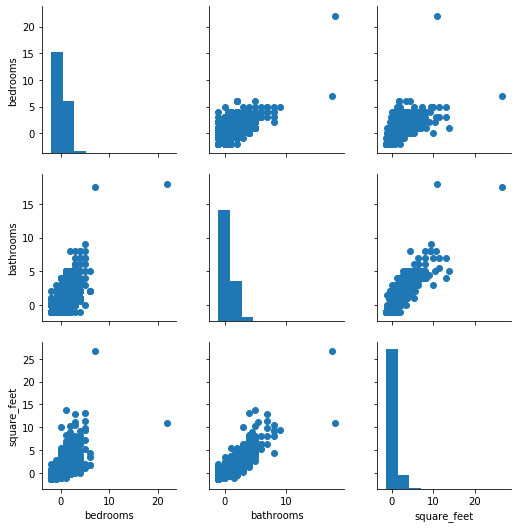

In [7]:
g = sns.PairGrid(x_train)
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)

### Create Baseline Linear Regression Model Using modeling_function()

In [8]:
predictions = model_zillow.modeling_function(x_train, y_train)
predictions

,actual,lm1,baseline
0,475946.0,6.372533e+05,466158.614463
1,250799.0,2.482175e+05,466158.614463
2,199479.0,2.052506e+05,466158.614463
3,1252995.0,8.897366e+05,466158.614463
4,107124.0,4.586284e+05,466158.614463
5,53793.0,1.218262e+05,466158.614463
6,337404.0,8.732689e+05,466158.614463
7,172673.0,4.625023e+05,466158.614463
8,484848.0,4.171228e+05,466158.614463
9,372791.0,1.868394e+05,466158.614463


#### Evaluate:  Compare Model Performance Compared to Baseline Value

The Baseline Model Evaluation:
The baseline model evaluation reveals an $R^2$ value of 0 and a mean of squared errors (MSS) of 434952376131.3264. 

In [9]:
MSE_baseline = mean_squared_error(predictions.actual, predictions.baseline)
SSE_baseline = MSE_baseline*len(predictions.actual)
RMSE_baseline = sqrt(MSE_baseline)
r2_baseline = r2_score(predictions.actual, predictions.baseline)
print(MSE_baseline,SSE_baseline,RMSE_baseline,r2_baseline)

434952376131.3264 5551732128940250.0 659509.1933637669 0.0


The Linear Regression Model Evaluation:
The linear regression model evaluation metrics reveal an $R^2$ value of .4278


In [10]:
MSE_1 = mean_squared_error(predictions.actual, predictions.lm1)
SSE_1 = MSE_1*len(predictions.actual)
RMSE_1 = sqrt(MSE_1)
r2_1 = r2_score(predictions.actual, predictions.lm1)
print(MSE_1,SSE_1,RMSE_1,r2_1)

248861731613.72165 3176471142317543.0 498860.4330007759 0.42784142524472124


#### Side-by-Side Comparison of Evaluation Metrics:

In [11]:
df_eval = pd.DataFrame(np.array(['SSE','MSE','RMSE', "R2"]), columns=['metric'])
df_eval['model_error'] = np.array([SSE_1, MSE_1, RMSE_1, r2_1])
df_eval['baseline_error'] = np.array([SSE_baseline, MSE_baseline, RMSE_baseline, r2_baseline])
df_eval['error_delta'] = df_eval.model_error - df_eval.baseline_error
df_eval

,metric,model_error,baseline_error,error_delta
0,SSE,3.176471e+15,5.551732e+15,-2.375261e+15
1,MSE,2.488617e+11,4.349524e+11,-1.860906e+11
2,RMSE,4.988604e+05,6.595092e+05,-1.606488e+05
3,R2,4.278414e-01,0.000000e+00,4.278414e-01


### Create a Field that Calculates the Tax Rate:

In [14]:
df["tax_rate"] = df["taxes"] / df["home_value"]
df.head()

,bedrooms,bathrooms,square_feet,taxes,home_value,propertylandusedesc,fips_number,tax_rate
0,4.0,2.0,1604,6089.82,498347.0,Single Family Residential,6037,0.012220
1,3.0,3.0,2384,6679.55,549917.0,Single Family Residential,6037,0.012146
2,3.0,2.0,1574,3876.31,235272.0,Single Family Residential,6037,0.016476
3,2.0,2.0,1619,4206.15,340000.0,Single Family Residential,6037,0.012371
4,2.0,3.0,2408,24353.42,2017254.0,Single Family Residential,6037,0.012073


In [23]:
# df["fips_number"] == 6037
# df["fips_number"] == 6059
# df["fips_number"] == 6111

df["county_name"] = df["fips_number"].map({6037: "Los Angeles", 6059: "Orange", 6111: "Ventura"})
df[df.county_name!="Los Angeles"]

,bedrooms,bathrooms,square_feet,taxes,home_value,propertylandusedesc,fips_number,tax_rate,county_name
12388,4.0,2.0,1444,5822.90,479778.0,Single Family Residential,6059,0.012137,Orange
12389,2.0,2.0,949,872.48,50102.0,Single Family Residential,6059,0.017414,Orange
12390,2.0,2.0,1090,2953.10,290614.0,Single Family Residential,6059,0.010162,Orange
12391,4.0,3.0,2505,9740.22,829744.0,Single Family Residential,6059,0.011739,Orange
12392,5.0,3.5,4958,5235.58,465753.0,Single Family Residential,6059,0.011241,Orange
12393,2.0,1.5,854,4090.82,342564.0,Single Family Residential,6059,0.011942,Orange
12394,3.0,2.0,1276,3117.46,255401.0,Single Family Residential,6059,0.012206,Orange
12395,3.0,2.0,1210,5322.70,445876.0,Single Family Residential,6059,0.011938,Orange
12396,3.0,2.5,2283,3566.08,288575.0,Single Family Residential,6059,0.012358,Orange
12397,3.0,2.0,1793,3107.62,254520.0,Single Family Residential,6059,0.012210,Orange


### Create Distributions of the Tax Rates by County:

### Correlation Test

### T-Test